## <font color='mediumvioletred'> The Goal of this code:
### <font color='blueviolet'> Compare image enhancement for the same image in JPEG and PNG formats

#### <font color='crimson'> Import necessary libraries

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### <font color='crimson'> Read the noisy image in JPEG format

In [69]:
img_jpg = cv2.imread('input.jpg')

#### <font color='crimson'> Read the noisy image in JPEG format

In [70]:
img_png = cv2.imread('input.png')

#### <font color='crimson'> Display a single image using Matplotlib.
**Parameters:**
* img (numpy.ndarray): The image to be displayed. 
* title (str): Title for the image plot. Default is an empty string.
* fig_height (int): Height of the figure in inches. Default is 8.
* fig_width (int): Width of the figure in inches. Default is 6.

In [71]:
def show_img_plt(img, title='', fig_height=8, fig_width=6):
    plt.figure(figsize=(fig_height, fig_width))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

#### <font color='crimson'> Display multiple images using Matplotlib in a grid layout.

**Parameters:**
* rows (int): Number of rows in the grid layout.
* columns (int): Number of columns in the grid layout.
* img_names (list): List of images to be displayed.
* titles (list): List of titles for each image. Default is None.
* cmap (str or None): Colormap for the images. Default is None.
* vmin (float or None): Minimum value for colormap normalization. Default is 0.
* vmax (float or None): Maximum value for colormap normalization. Default is 255.

In [72]:
def show_mult_img_plt(rows, columns, img_names, titles=None, cmap=None, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.imshow(cv2.cvtColor(img_names[i], cv2.COLOR_BGR2RGB), cmap=cmap, vmin=vmin, vmax=vmax)
        ax.axis('off')
        if titles:
            ax.set_title(titles[i])

#### <font color='crimson'> Define the function to remove noise and show images to compare them

In [73]:
def denoise(img):
    # Show the original noisy image
    show_img_plt(img, title='Noisy Image', fig_height=8, fig_width=6)
    
    # Denoising process:
    # Step 1: Apply median filter twice to reduce noise
    median_image = cv2.medianBlur(img, 3)
    median_image2 = cv2.medianBlur(median_image, 3)
    
    # Step 2: Apply Gaussian filter to further enhance denoising
    gaussian_blurred = cv2.GaussianBlur(median_image2, (3, 3), 0)  
    
    # Enhancement using CLAHE method
    # Split the image into its RGB channels
    r, g, b = cv2.split(gaussian_blurred)
    
    # Apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to each channel
    clahe = cv2.createCLAHE(clipLimit=50)
    cl_r = clahe.apply(r)
    cl_g = clahe.apply(g)
    cl_b = clahe.apply(b)
    
    # Merge the enhanced channels back into a single image
    output = cv2.merge((cl_r, cl_g, cl_b))

    return output

#### <font color='crimson'> Denoise the image in JPEG format

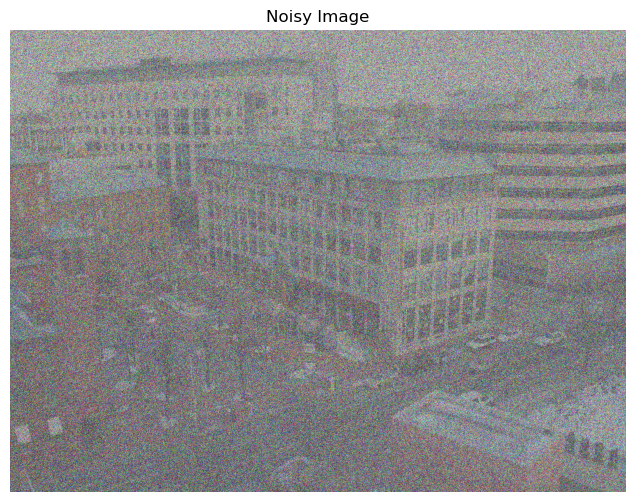

In [74]:
output_jpg = denoise(img_jpg)

#### <font color='crimson'> Display the denoised and enhanced image

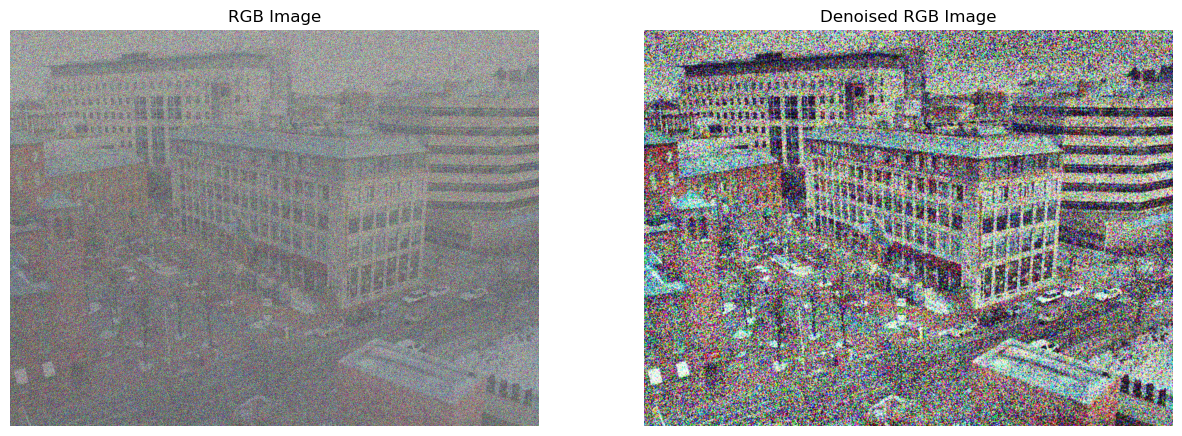

In [75]:
show_mult_img_plt(1, 2, [img_jpg, output_jpg], ['RGB Image', 'Denoised RGB Image'])

#### <font color='crimson'> Denoise the image in PNG format

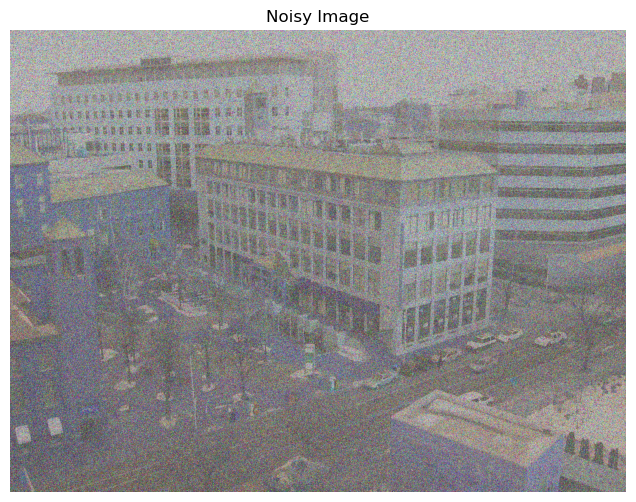

In [76]:
output_png = denoise(img_png)

#### <font color='crimson'> Display the denoised and enhanced image

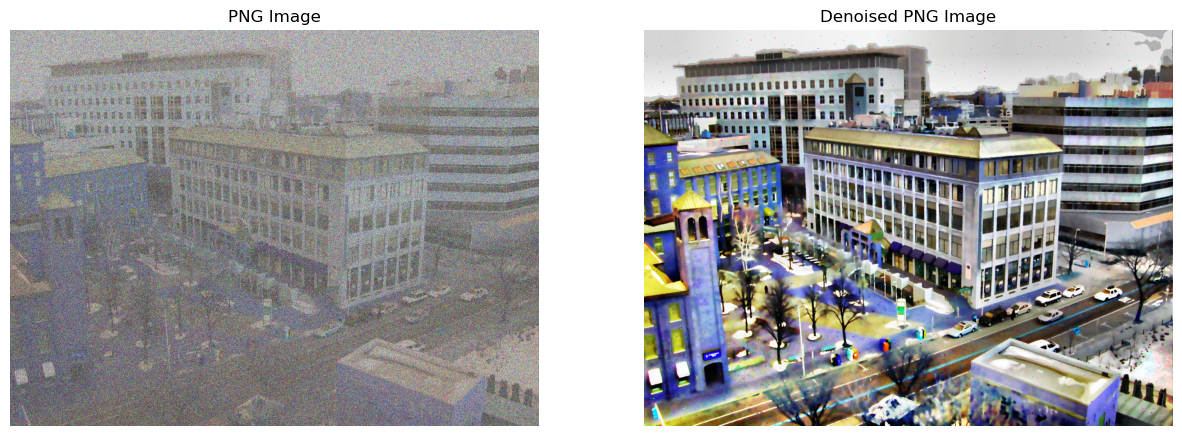

In [77]:
show_mult_img_plt(1, 2, [img_png, output_png], ['PNG Image', 'Denoised PNG Image'])

## <font color='mediumvioletred'> Conclusion:
### <font color='blueviolet'> In this code, we compared the performance of image enhancement techniques on the same image stored in both JPEG and PNG formats. Generally, PNG images tend to retain more data due to their lossless compression, resulting in potentially better performance for image enhancement tasks. However, the actual improvement may vary depending on the specific characteristics of the images and the enhancement techniques applied.